In [33]:
# Import Dependencies

# Keras: Machine Learning Library (Includes MNIST Dataset)
import keras
from keras.datasets import mnist
from keras.layers import Dense, Activation
from keras.models import Sequential

# Matplotlib: Data Visualization Library
import matplotlib.pyplot as plt

In [2]:
# Load Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
# Data Exploration

print("Training inputs shape is " + str(x_train.shape)) # 60,000 samples, each image: 28 x 28 pixels
print("Training labels:")
print(y_train)
print("Training labels shape is " + str(y_train.shape))
print()
print("Test inputs shape is " + str(x_test.shape)) # 10,000 samples, each image: 28 x 28 pixels
print("Test labels:")
print(y_test)
print("Test labels shape is " + str(y_test.shape))

Training inputs shape is (60000, 28, 28)
Training labels:
[5 0 4 ... 5 6 8]
Training labels shape is (60000,)

Test inputs shape is (10000, 28, 28)
Test labels:
[7 2 1 ... 4 5 6]
Test labels shape is (10000,)


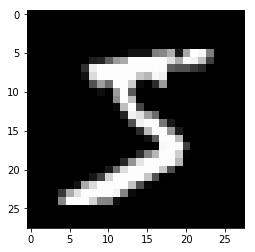

In [24]:
# Visualize the input samples

sample_num = 0 # change this number and re-run the cell to see different image samples!

# Use the matplotlib library to display the imported images
plt.imshow(x_train[sample_num], cmap=plt.get_cmap('gray'))
plt.show()

## Pre-Processing the Data
- **Flatten** the 28 x 28 2D images into 784-dimensional column vectors. Each pixel will then correspond to one neuron in the 784-dimensional input layer of our neural network.
- **Normalize** the pixel values from 0-255 to 0-1. We can do this by simply dividing each of the 0-255 greyscale values by 255. Neural networks typically like to work with smaller values, so this normalization is a pretty common first step in most deep learning tasks.
- **Categorize** the outputs into 10-dimensional "one-hot" vectors. The MNIST dataset originally contains actual numerical labels for each image (e.g. 1, 2, ...), but remember that our neural network outputs 10 distinct values (one for each digit) -- not just the digit number itself. We want our training labels to match up with our neural network output. These categorized vectors contain all 0's, except a 1 in the location indicating which digit the image corresponds to.

In [41]:
# Flatten 28*28 images to a 784 vector for each image

num_pixels = x_train.shape[1] * x_train.shape[2] # 28 * 28 = 784
x_train_flattened = x_train.reshape(x_train.shape[0], num_pixels).astype('float32') # new shape: 60,000 x 784
x_test_flattened = x_test.reshape(x_test.shape[0], num_pixels).astype('float32') # new shape: 10,000 x 784

In [42]:
# Normalize pixel values to between 0-1

x_train_flattened = x_train_flattened / 255.
x_test_flattened = x_test_flattened / 255.

In [43]:
# Categorize the outputs with Keras ("one-hot" vectors)

y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10)

# Let's see result of categorizing the outputs
print(y_train_categorical[:5]) # Print out first 5 training label vectors

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Creating our Neural Network Model
1. **Initialize** the network, add desired layers. The settings we decide to use, e.g. number of layers, number of neurons per layer, are called hyperparameters, and have to be tuned by hand, rather than learned via gradient descent.
2. **Compile** the network to get ready for training. This tells the network what cost/loss function to use ("cost" and "loss" are used interchangeably), and what type of gradient descent to use.
3. **Fit** the network to the training images. This actually feeds the training data into the network, and uses gradient descent and backpropagation to adjust the network's weights in order to minimize the cost function.

In [44]:
# Initialize simple neural network model
model = Sequential()

# Hidden layer 1: 64 neurons, 'relu' activation 
    # (see: https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
    # http://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html
model.add(Dense(units=64, input_dim=784, activation='relu'))

# Hidden layer 2: 32 neurons, 'relu' activation
model.add(Dense(units=32, activation='relu'))

# Output layer: 10 neurons (one for each class), 'softmax' activation
    # This layer represents the scores that the network assigns to each possible digit, 1-10
    # See: http://dataaspirant.com/2017/03/07/difference-between-softmax-function-and-sigmoid-function/
model.add(Dense(units=10, activation='softmax'))

In [45]:
# Compile the model, get ready to train

    # Loss: Categorical Crossentropy
        # See: http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html
    # Optimizer: stochastic gradient descent (SGD)
    # Additional metrics: Accuracy

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [46]:
# Print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Fit the model to the training data

# Train the model
    # Number of epochs: 10 (i.e. how many times to loop over the training data)
    # Batch size: 16 (how big our "drunk walk" samples should be)
    # See: 'fit()' in https://keras.io/models/sequential/
    
model.fit(x_train_flattened, y_train_categorical, epochs=10, batch_size=16)

Epoch 1/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.5210 - acc: 0.8546
Epoch 2/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.2534 - acc: 0.9269
Epoch 3/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.2027 - acc: 0.9414
Epoch 4/10
60000/60000 [==============================] - 15s 257us/step - loss: 0.1702 - acc: 0.9515
Epoch 5/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.1463 - acc: 0.9580
Epoch 6/10
60000/60000 [==============================] - 13s 225us/step - loss: 0.1285 - acc: 0.9631
Epoch 7/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.1147 - acc: 0.9671
Epoch 8/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.1037 - acc: 0.9701
Epoch 9/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0945 - acc: 0.9730
Epoch 10/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.

## Evaluating Our Network

In [49]:
# Evaluate trained model on test data

# Returns final test loss & test accuracy
    # See: 'evaluate' in https://keras.io/models/sequential/
loss_and_metrics = model.evaluate(x_test_flattened, y_test_categorical, batch_size=128)
final_cost = loss_and_metrics[0]
final_accuracy = loss_and_metrics[1]

print()
print("Final test cost: ", final_cost)
print("Final test accuracy: ", final_accuracy)

10000/10000 [==============================] - 1s 56us/step

Final test cost:  0.10325387454628944
Final test accuracy:  0.9694


**Final Sanity Check:** Make sure the our neural network's predictions match up with the actual images

Output vector:  [1.2435037e-06 3.6855128e-09 3.0144693e-07 4.9909951e-05 1.3093435e-04
 3.1708862e-04 1.4568918e-09 7.6785445e-04 1.7215608e-04 9.9856049e-01]
Predicted digit:  9


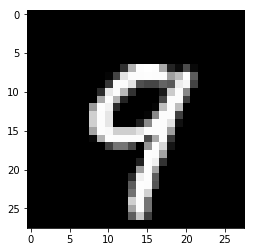

In [55]:
import numpy as np

sample_num = 12 # which test sample to look at. Play around with this number to see how \
    # our neural network performs on different test images

# Predicted class
test_sample = np.expand_dims(x_test_flattened[sample_num], axis=0) # pick out a one-sample "batch" to feed into model
predicted_scores = model.predict(test_sample) # outputted probabilities vector
print("Output vector: ", predicted_scores[0]) # print predicted scores

predicted_class = np.argmax(predicted_scores) # pick the class with highest probability --> final prediction
print("Predicted digit: ", predicted_class) # print predicted classification

# Show actual input image
plt.imshow(x_test[sample_num], cmap=plt.get_cmap('gray'))
plt.show()

## Congrats! You just did deep learning!
If you have extra time, feel free to play around with the hyperparameters (number of neurons per layer, number of epochs, batch size, etc.) to see if you can improve the network's final accuracy.